In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [73]:
data = pd.read_csv('/content/GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400
3809,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900


In [0]:
#data_training = data[data['Date']<'2019-01-01'].copy()
data_training = data.copy()

In [75]:
data_test = data[data['Date']>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


In [76]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [77]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.29485734e-04, 9.33053728e-04, 0.00000000e+00, 1.32809895e-04,
        5.43577404e-01],
       [7.40330113e-04, 2.95198254e-03, 1.85599897e-03, 3.34030536e-03,
        2.77885613e-01],
       [4.70232083e-03, 4.72156249e-03, 5.35132373e-03, 3.77897219e-03,
        2.22150736e-01],
       ...,
       [9.23239627e-01, 9.19093516e-01, 9.14759554e-01, 9.19410981e-01,
        1.95471905e-02],
       [9.32949010e-01, 9.37162354e-01, 9.36704665e-01, 9.36514471e-01,
        1.39882424e-02],
       [9.43164680e-01, 9.42623433e-01, 9.48670217e-01, 9.35448073e-01,
        1.01170917e-02]])

In [0]:
X_train = []
y_train = []

In [79]:
training_data.shape[0]

3810

In [0]:
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [82]:
X_train.shape, y_train.shape

((3750, 60, 5), (3750,))

In [0]:
#### Building LSTM

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [0]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [86]:
regressior.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [0]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [88]:
regressior.fit(X_train, y_train, epochs=1, batch_size=32)

Train on 3750 samples
3750/3750 [==============================] - 42s 11ms/sample - loss: 0.0165


In [0]:
### Prepare Test Dataset

In [90]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [91]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3750,2019-07-15,1146.859985,1150.819946,1139.400024,1150.339966,1150.339966,903800
3751,2019-07-16,1146.000000,1158.579956,1145.000000,1153.579956,1153.579956,1238800
3752,2019-07-17,1150.969971,1158.359985,1145.770020,1146.349976,1146.349976,1170000
3753,2019-07-18,1141.739990,1147.604980,1132.729980,1146.329956,1146.329956,1291300
3754,2019-07-19,1148.189941,1151.140015,1129.619995,1130.099976,1130.099976,1647200
3755,2019-07-22,1133.449951,1139.250000,1124.239990,1138.069946,1138.069946,1301500
3756,2019-07-23,1144.000000,1146.900024,1131.800049,1146.209961,1146.209961,1093700
3757,2019-07-24,1131.900024,1144.000000,1126.989990,1137.810059,1137.810059,1589800
3758,2019-07-25,1137.819946,1141.699951,1120.920044,1132.119995,1132.119995,2209800
3759,2019-07-26,1224.040039,1265.550049,1224.000000,1250.410034,1250.410034,4805800


In [0]:
past_60_days = data_training.tail(60)

In [0]:
df = past_60_days.append(data_training, ignore_index = True)
df = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [94]:
inputs = scaler.transform(df)
inputs.shape

(3810, 5)

In [0]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i, 0])

In [96]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape

(3750, 60, 5)

In [97]:
y_pred = regressior.predict(X_train)
y_pred[-1], y_train[-1]

(array([0.8853152], dtype=float32), 0.9431646798603849)

In [104]:
scaler.scale_[0]

0.0008165997088794274

In [99]:
scale = 1/8.16599709e-04
scale

1224.5901988191868

In [100]:
y_pred = y_pred[-1]*scale
y_pred
#y_test = y_test*scale

array([1084.1483], dtype=float32)

In [0]:
### Visualization

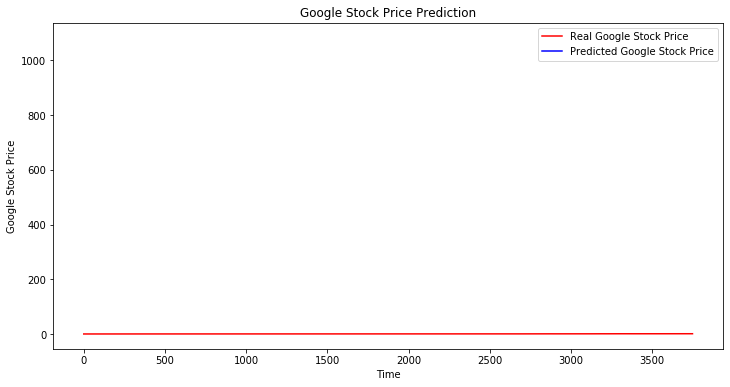

In [102]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [103]:
low LSTMwith tf.Session() as sess:
    saver.restore(sess, './model_saved')
    preds = []
    X_batch = last_n_steps_value
    X_batch = X_batch.reshape(-1, n_steps, 1)
    for i in range(number_you_want_to_predict):
        pred = sess.run(outputs, feed_dict={X: X_batch})
        preds.append(pred.reshape(7)[-1])
        X_batch = X_batch[:, 1:]
        # Using predict value to replace real value
        X_batch = np.append(X_batch, pred[:, -1])
        X_batch = X_batch.reshape(-1, n_steps, 1)

SyntaxError: ignored